In [1]:
#Task 1 – Loading the Data

#a.)importing the required libraries
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import numpy as np

from sklearn import linear_model, metrics

In [2]:
#b)loading the data

emission = pd.read_csv('CO2 emission.csv')

In [3]:
#Task 2 - Analysing and cleaning data
#a.)Analyzing the shape of Data
emission.shape

(1067, 14)

In [ ]:
##b.)Printing the top 5 rows

emission.head()

In [4]:
#c)Picking out four columns from the above dataframe which contributes towards CO2 emissions for a car and storing the data in emission_new variable.

emission_new = emission[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','TORQUE','CO2EMISSIONS']]

In [5]:
emission_new.shape#will return no. of rows and columns

(1067, 5)

In [6]:
#Task 3 - Performing explanatory analysis
#a.)Checking the basic statistics of the given dataset columns using describe()
#b.)Checking the units of all the columns
emission_new.describe()#describe() will give basic statistics of data

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,TORQUE,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.349110,5.779756,11.580881,1419.236645,256.228679
std,1.419466,1.797758,3.485595,351.701581,63.372304
min,1.000000,2.000000,4.700000,400.000000,108.000000
25%,2.000000,4.000000,9.000000,1153.500000,207.000000
50%,3.400000,6.000000,10.900000,1395.500000,251.000000
75%,4.300000,8.000000,13.350000,1632.000000,294.000000
max,8.400000,12.000000,25.800000,2699.000000,488.000000


In [7]:
emission_new.isnull().sum()

ENGINESIZE              0
CYLINDERS               0
FUELCONSUMPTION_COMB    0
TORQUE                  0
CO2EMISSIONS            0
dtype: int64

<Figure size 1152x864 with 0 Axes>

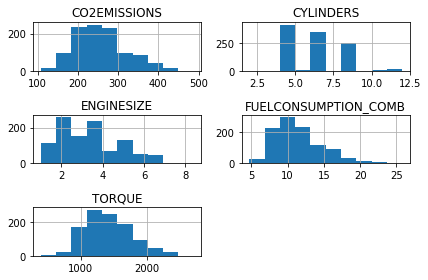

In [8]:
#Task 4 - Visualizing the Data
#a.) Creating the Box-plot of all the numeric columns
fig = plt.figure(figsize=(16,12))
emission_new.hist()
plt.tight_layout()
plt.show()

In [9]:
#b.)finding out the dependent variable through correlation

corr = emission_new.corr()#finding correlation between variables

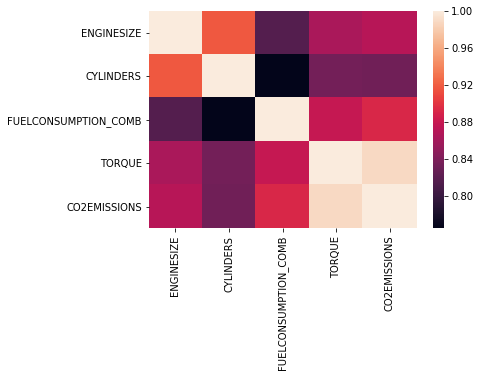

In [10]:
#c.) Plotting a heatmap for correlation

sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)
plt.show()

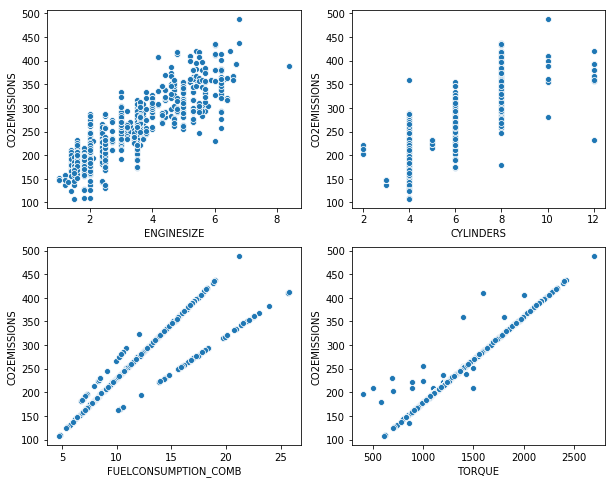

In [12]:
#d.) Creating a figure and plotting 3 scatterplot graphs in the same row.

fig = plt.figure(figsize=(10,8))
a1 = fig.add_subplot(221)
a2 = fig.add_subplot(222)
a3 = fig.add_subplot(223)
a4 = fig.add_subplot(224)
sns.scatterplot(x = 'ENGINESIZE', y = 'CO2EMISSIONS',
                data = emission_new , ax = a1)
sns.scatterplot(x = 'CYLINDERS', y = 'CO2EMISSIONS', 
                data = emission_new , ax = a2)
sns.scatterplot(x = 'FUELCONSUMPTION_COMB', y = 'CO2EMISSIONS',
                data = emission_new , ax = a3)
sns.scatterplot(x = 'TORQUE', y = 'CO2EMISSIONS', 
                data = emission_new , ax = a4)
plt.show()

#Conclusion:CO2EMISSIONS is a dependent variable and ENGINESIZE, FUELCONSUMPTION_COMB are the two independent variables.

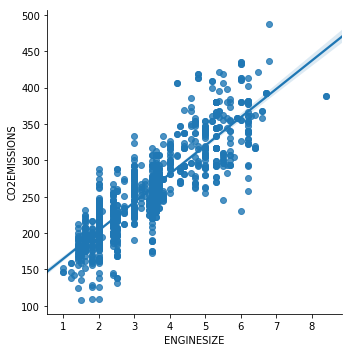

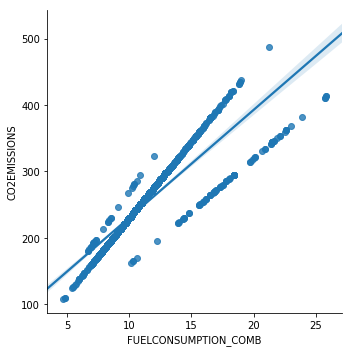

In [77]:
#e.)plotting an lmplot between:
#•ENGINESIZE and CO2 EMISSIONS
#•FUELCONSUMPTION_COMB and CO2 EMISSIONS

sns.lmplot(x='ENGINESIZE',y='CO2EMISSIONS',data=emission_new)
sns.lmplot(x='FUELCONSUMPTION_COMB',y='CO2EMISSIONS',data=emission_new)

In [13]:
from sklearn.model_selection import train_test_split#importing for performing linear regression

In [14]:
#Task 5 - Creating a Prediction Model using Simple Linear Regression
x = emission[['ENGINESIZE']]
y = emission['CO2EMISSIONS']
train_x , test_x , train_y , test_y = train_test_split(x,y,test_size=0.2,random_state=12)

In [15]:
simple_model = linear_model.LinearRegression()

In [18]:
#a.)Fitting a Simple Linear Regression for CO2EMISSIONS and ENGINESIZE

simple_model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
#b.) Finding out the values of intercept slope and the R-square value

In [19]:
simple_model.score(train_x,train_y)

0.7491755083232323

In [20]:
print("Coefficient or Slope of regression line is: " , simple_model.coef_[0])
print("Intercept of regression line is: ",simple_model.intercept_)

Coefficient or Slope of regression line is:  38.578698638039825
Intercept of regression line is:  126.78286660877598


In [36]:
#c)using y=mx+b where m=slope and b=intercept of regression,to calculate CO2 emission if engine size is 3.5

m=[[simple_model.coef_[0]*3.5 + simple_model.intercept_]]

In [41]:
print('CO2 emission value if engine size is 3.5:',m)

CO2 emissions if engine size is 3.5: [[261.8083118419154]]


In [ ]:
#d)predicting value of CO2 emission if engine size is 3.5 using predict() method

In [38]:
predict_y = simple_model.predict(m)#using predict method to predict the test value 

In [39]:
predict_y

array([10227.00683009])

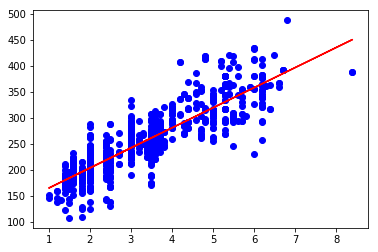

In [76]:
#visualizing the predictions
plt.scatter(train_x,train_y, color='blue')
plt.plot(train_x,simple_model.coef_[0]*train_x+simple_model.intercept_,'-r')

In [80]:
print("The mean squared error value is: ",metrics.mean_squared_error(m,predict_y))

The mean squared error value is:  99305181.50813329


In [42]:
##Task 6 - Multivariate Prediction Model using Linear Regression
#In this model, I will use ENGINESIZE and FUELCONSUUMPTION_COMB as independent variables and constructing a multivariate regression model using the same.

multi_model = linear_model.LinearRegression()

In [43]:
#a)Fitting a Linear Regression for CO2 EMISSIONS while keeping ENGINESIZE, FUELCONSUMPTION_COMB as two different x-parameters

X = emission[['ENGINESIZE','FUELCONSUMPTION_COMB']]
Y = emission['CO2EMISSIONS']
Train_x , Test_x , Train_y , Test_y = train_test_split(X,Y,test_size = 0.2, random_state=12)

In [44]:
multi_model.fit(Train_x,Train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
#b.)Finding out the values of intercept slopes and the R-square value.
print("Coefficient or Slope of regression line is: " , multi_model.coef_)
print("Intercept of regression line is: ",multi_model.intercept_)

Coefficient or Slope of regression line is:  [18.84617427  9.85872091]
Intercept of regression line is:  78.41438764097629


In [60]:
#c)
#when ENGINESIZE is 3 and FUELCONSUMPTION_COMB is 10
#using y=m1x1+m2x2+b where m1&m2=slopes ,b=intercept and x1=3 ,x2=10 of regression,to calculate CO2 emission if engine size is 3.5

n=[[multi_model.coef_[0]*3+multi_model.coef_[1]*10+multi_model.intercept_]]

In [61]:
print('CO2 emission value if ENGINESIZE is 3 and FUELCONSUMPTION_COMB is 10 :',n)

CO2 emission value if ENGINESIZE is 3 and FUELCONSUMPTION_COMB is 10 : [[233.54011949613138]]


In [48]:
#d)predicting value of CO2 emission using predict() method

In [69]:
predict_Y = multi_model.predict(Test_x)

In [ ]:
#Task 7 - Model Performance:calculating the performance of moeel using predict()
#a.)
simple_y=simple_model.predict(test_x)
multi_y=multi_model.predict(Test_x)

In [ ]:
# b) finding out the  mean squared value of both models
simple_mse= metrics.mean_squared_error(test_y,predict_y)
multi_mse = metrics.mean_squared_error(Test_y,predict_Y)
print("The mean squared error value for simple_model is: ",simple_mse)
print("The mean squared error value for multi_model is: ",multi_mse)

In [ ]:
#c.)The lesser the mean-squared error value,the better is the model.
#Hence,multi_model is better.